# Tesla Stock Data with yfinance

In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Tesla Revenue Web Scraping

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Get the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page
tables = soup.find_all("table")

# Print how many tables found to debug
print(f"Found {len(tables)} tables.")

# Inspect and select the correct table (likely the first or second one)
# We'll try them in order until one has valid rows
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows[1:]:  # Skip header
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                tesla_revenue = pd.concat(
                    [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                    ignore_index=True
                )

# Show last few rows
print(tesla_revenue.tail())


Found 6 tables.
          Date Revenue
61  2010-09-30      31
62  2010-06-30      28
63  2010-03-31      21
64  2009-09-30      46
65  2009-06-30      27


# Using yfinance to Extract Stock Data

In [15]:
# Question 1 and 3: Extract stock data for Tesla and GameStop

import yfinance as yf
import pandas as pd

# Extracting Tesla data (Question 1)
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display Tesla data head (required in Q1)
print("Tesla Data (first 5 rows):")
print(tesla_data.head())

# Question 3: Extracting GameStop data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index so Date is a column
gme_data.reset_index(inplace=True)

# Display first 5 rows
print("\nGameStop Data (first 5 rows):")
print(gme_data.head())


Tesla Data (first 5 rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  

GameStop Data (first 5 rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.6

# Using Webscraping to Extract GME Revenue Data

In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    if col:
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

print(gme_revenue.tail())


          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


# Tesla Stock and Revenue Graph

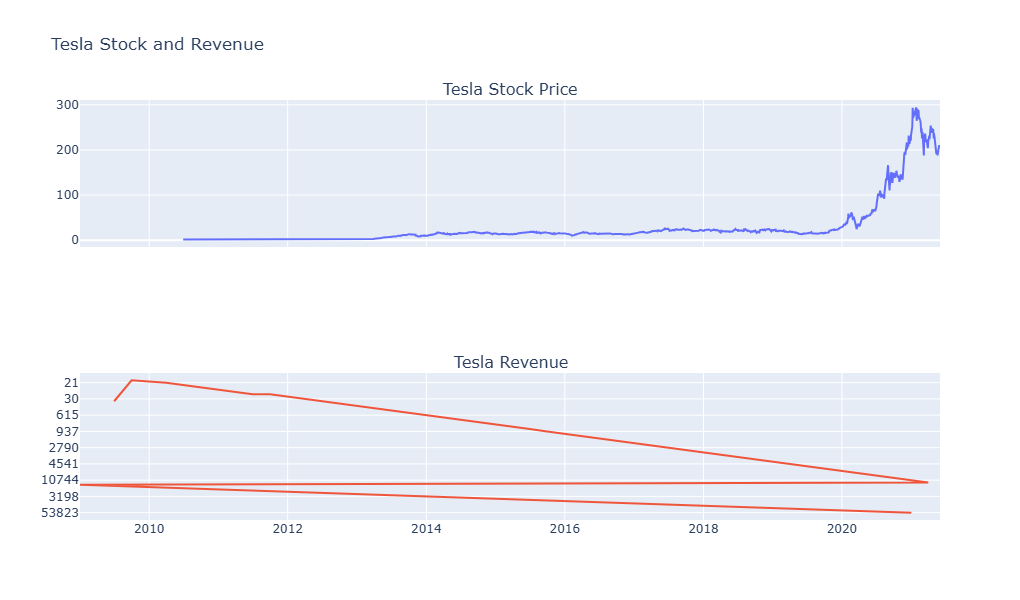

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=(f"{stock} Stock Price", f"{stock} Revenue"),
                        vertical_spacing=0.3)
    
    stock_data_filtered = stock_data[stock_data.Date <= '2021-06-01']
    revenue_data_filtered = revenue_data[revenue_data.Date <= '2021-06-01']

    fig.add_trace(go.Scatter(x=stock_data_filtered.Date, y=stock_data_filtered.Close, name="Stock Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_filtered.Date, y=revenue_data_filtered.Revenue, name="Revenue"), row=2, col=1)

    fig.update_layout(showlegend=False, height=600, title=f"{stock} Stock and Revenue")
    fig.show()

make_graph(tesla_data, tesla_revenue, "Tesla")


# GameStop Stock and Revenue Graph

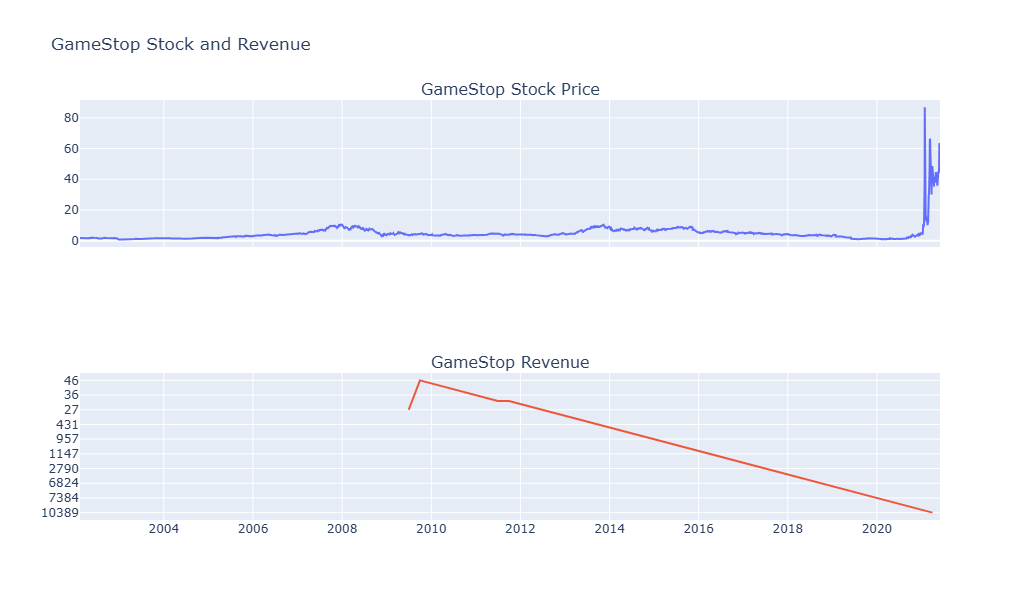

In [20]:
make_graph(gme_data, gme_revenue, "GameStop")
